## Download de dependências

Este comando utiliza o gerenciador de pacotes `pip` para instalar um conjunto de bibliotecas Python essenciais para manipulação de dados, visualização, aprendizado de máquina e computação numérica. As bibliotecas instaladas são: `pandas` para estruturas de dados e ferramentas de análise de dados; `matplotlib` e `seaborn` para criação de gráficos estáticos, animados e interativos; `scikit-learn` para algoritmos de aprendizado de máquina; `tensorflow` para computação numérica e aprendizado de máquina em larga escala; e `plotly` para visualizações interativas.

In [2]:
!pip install pandas matplotlib seaborn scikit-learn tensorflow plotly

Defaulting to user installation because normal site-packages is not writeable


## Importar bibliotecas Python

Este trecho de código importa diversas bibliotecas e módulos Python essenciais para manipulação de dados, processamento de texto, aprendizado de máquina e visualização. São importados: `numpy` para operações numéricas; `pandas` para manipulação e análise de estruturas de dados; `plotly.express` para criação de visualizações interativas; e `re` para operações com expressões regulares. Do `tensorflow.keras`, são importados `Tokenizer` para converter texto em sequências numéricas e `pad_sequences` para garantir que essas sequências tenham o mesmo comprimento. Da biblioteca `sklearn.metrics`, são trazidos `classification_report`, `confusion_matrix`, e `ConfusionMatrixDisplay` para avaliação de modelos de classificação, e `matplotlib.pyplot` é importado para plotagem gráfica. Para divisão de dados e validação cruzada, são importados `train_test_split` e `KFold` de `sklearn.model_selection`. Finalmente, a biblioteca `tensorflow` é importada, geralmente referenciada como `tf`, para desenvolvimento e treinamento de modelos de aprendizado de máquina, especialmente redes neurais.

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf

2025-05-31 21:11:05.159928: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 21:11:05.160743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 21:11:05.165403: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 21:11:05.178301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748736665.199838   56745 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748736665.20

## Carregar dataset

Este segmento de código utiliza a biblioteca `pandas` para carregar dados de dois arquivos CSV distintos em DataFrames. O primeiro comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')`, lê o arquivo `True.csv`, localizado no diretório especificado, e armazena seu conteúdo em um DataFrame chamado `true_df`. De forma análoga, o segundo comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')`, carrega os dados do arquivo `Fake.csv` para um DataFrame denominado `fake_df`. Presume-se que estes arquivos contenham, respectivamente, notícias verdadeiras e falsas.

In [4]:
true_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')
fake_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')

## Adicionar nova coluna "label"

Este trecho de código adiciona uma nova coluna chamada `label` a dois DataFrames existentes, `true_df` e `fake_df`. Ao DataFrame `true_df`, é atribuído o valor inteiro `1` para todas as entradas nesta nova coluna `label`. De forma similar, ao DataFrame `fake_df`, é atribuído o valor inteiro `0` para todas as entradas na coluna `label`. Esta operação é tipicamente realizada para criar uma variável alvo em tarefas de classificação, distinguindo as amostras dos dois DataFrames (por exemplo, notícias verdadeiras e falsas).

In [5]:
true_df['label'] = 1
fake_df['label'] = 0

## Cominar DataFrames

Este trecho de código realiza a combinação e o embaralhamento de dois DataFrames, `true_df` e `fake_df`, utilizando a biblioteca `pandas`. Primeiramente, a função `pd.concat([true_df, fake_df])` une os dois DataFrames verticalmente, empilhando suas linhas para criar um único DataFrame consolidado. Subsequentemente, o método `.sample(frac=1, random_state=42)` é aplicado a este DataFrame combinado. O argumento `frac=1` especifica que todas as linhas do DataFrame devem ser selecionadas (ou seja, 100% da amostra), e `random_state=42` garante que a ordem do embaralhamento seja a mesma sempre que o código for executado, proporcionando reprodutibilidade. O DataFrame resultante, agora contendo os dados de ambos os DataFrames originais de forma aleatoriamente misturada, é atribuído à variável `df`.

In [6]:
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42)

### Limpeza e pré-tratamento textual

Este trecho de código define uma função para limpeza de texto e, em seguida, a aplica a uma coluna de um DataFrame `pandas`. A função `clean_text` recebe uma string como entrada, converte todos os caracteres para minúsculas e utiliza expressões regulares (`re.sub`) para remover quaisquer caracteres que não sejam letras do alfabeto (maiúsculas ou minúsculas) ou espaços em branco. O resultado é uma versão simplificada do texto original, contendo apenas palavras e espaços. Subsequentemente, esta função `clean_text` é aplicada a cada elemento da coluna `text` do DataFrame `df`, e os textos resultantes, já limpos, são armazenados em uma nova coluna chamada `cleaned_text` dentro do mesmo DataFrame.

In [7]:
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower())
df['cleaned_text'] = df['text'].apply(clean_text)

## Tokenização e padronização

Este trecho de código transforma dados textuais da coluna `cleaned_text` de um DataFrame `df` em um formato numérico adequado para modelos de aprendizado de máquina, além de preparar os rótulos correspondentes. Primeiramente, são definidos os parâmetros `max_words` como 5000, limitando o vocabulário às palavras mais frequentes, e `max_len` como 200, estabelecendo o comprimento fixo das sequências de texto. Um objeto `Tokenizer` do Keras é então inicializado com `num_words=max_words` e `oov_token='<OOV>'`, que será usado para representar palavras fora do vocabulário. Este `tokenizer` é treinado com os textos da coluna `df['cleaned_text']`. Em seguida, os textos são convertidos em sequências de inteiros (`texts_to_sequences`), e essas sequências são padronizadas para o comprimento `max_len` através da função `pad_sequences`, resultando na matriz `X`. Por fim, os valores da coluna `label` do DataFrame são extraídos como um array NumPy e atribuídos à variável `y`.

In [8]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

## Divisão do conjunto de dados

Este comando utiliza a função `train_test_split` da biblioteca `scikit-learn` para dividir os conjuntos de dados de características `X` e de rótulos `y` em subconjuntos de treinamento e teste. A divisão é configurada pelo parâmetro `test_size=0.4`, que especifica que 40% dos dados serão alocados para o conjunto de teste, enquanto os 60% restantes formarão o conjunto de treinamento. O argumento `random_state=42` é usado para garantir que a divisão seja feita da mesma maneira sempre que o código for executado, assegurando a reprodutibilidade dos resultados. Como resultado, são geradas quatro variáveis: `X_train` e `y_train` contendo as características e rótulos para treinamento do modelo, e `X_test` e `y_test` contendo as características e rótulos para avaliação do modelo.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construção do modelo

Este trecho de código define e compila um modelo de rede neural utilizando a API funcional do Keras, projetado para tarefas de classificação binária de texto. Primeiramente, uma camada de entrada `text_input` é definida para receber sequências de texto com comprimento `max_len`. Essas sequências são então processadas por uma camada `Embedding` que mapeia cada palavra do vocabulário (`max_words`) para um vetor denso de 64 dimensões. A saída da camada de embedding é alimentada em uma camada `Bidirectional GRU` (Gated Recurrent Unit) com 32 unidades, que processa a sequência em ambas as direções para capturar o contexto. Para regularização e prevenção de overfitting, uma camada `Dropout` com taxa de 0.5 é aplicada, seguida por uma camada `Dense` com 32 unidades, ativação ReLU e regularização L2 (com fator de 0.01). A camada final é uma `Dense` com uma única unidade e ativação sigmoide, que produz a probabilidade para a classificação binária. O `tf.keras.Model` é então instanciado com as entradas e saídas definidas. Por fim, o modelo é compilado com o otimizador 'adam', a função de perda 'binary_crossentropy' (adequada para problemas de duas classes) e configurado para rastrear as métricas de 'accuracy' e 'AUC'. O comando `model.summary()` exibe um resumo da arquitetura do modelo, detalhando as camadas e o número de parâmetros.

In [10]:
text_input = tf.keras.Input(shape=(max_len,), name='text')
text_emb = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(text_input)
text_out = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32))(text_emb)

dropout = tf.keras.layers.Dropout(0.5)(text_out)
dense = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=text_input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
model.summary()

2025-05-31 21:11:54.798095: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text (InputLayer)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,929 (1.30 MB)

 Trainable params: 340,929 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

## Treinamento do modelo

Este segmento de código executa o treinamento de um modelo Keras (`model`) previamente definido e compilado. São estabelecidos o tamanho do lote (`batch_size`) em 32 e o número de épocas (`epochs`) em 5. Uma lista de `callbacks` é configurada para otimizar o processo de treinamento: `tf.keras.callbacks.EarlyStopping` é usado para interromper o treinamento prematuramente se a métrica monitorada (geralmente a perda de validação) não melhorar após 2 épocas (`patience=2`), com a opção `restore_best_weights=True` para reter os pesos do modelo da melhor época. Adicionalmente, `tf.keras.callbacks.ReduceLROnPlateau` reduzirá a taxa de aprendizado pela metade (`factor=0.5`) se não houver melhora na métrica monitorada por 1 época (`patience=1`). O treinamento é iniciado chamando `model.fit()`, que utiliza os dados de treinamento `X_train` e `y_train`. Durante o treinamento, 20% dos dados de treinamento (`validation_split=0.2`) são automaticamente separados para validação. O processo utiliza o `batch_size`, `epochs` e `callbacks` especificados, e o histórico do treinamento (incluindo perdas e métricas por época) é armazenado na variável `history`.

In [11]:
batch_size = 32
epochs = 5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)
]
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 155s 160ms/step - accuracy: 0.8678 - auc: 0.9368 - loss: 0.4313 - val_accuracy: 0.9698 - val_auc: 0.9943 - val_loss: 0.1079 - learning_rate: 0.0010
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step - accuracy: 0.9751 - auc: 0.9951 - loss: 0.0907 - val_accuracy: 0.9841 - val_auc: 0.9980 - val_loss: 0.0622 - learning_rate: 0.0010
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 182s 203ms/step - accuracy: 0.9874 - auc: 0.9985 - loss: 0.0502 - val_accuracy: 0.9884 - val_auc: 0.9984 - val_loss: 0.0454 - learning_rate: 0.0010
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 181s 202ms/step - accuracy: 0.9945 - auc: 0.9995 - loss: 0.0252 - val_accuracy: 0.9905 - val_auc: 0.9983 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 170s 189ms/step - accuracy: 0.9971 - auc: 0.9997 - loss: 0.0171 - val_accuracy: 0.9898 - val_auc: 0.9976 - val_loss: 0.0405 - learning_rate: 0.0010


## Visualização de resultados

Este trecho de código é dedicado à visualização do histórico de treinamento de um modelo e à avaliação de seu desempenho no conjunto de teste. Inicialmente, são gerados e exibidos dois gráficos de linha utilizando `plotly.express`: o primeiro mostra a evolução da perda de treinamento (`loss`) e de validação (`val_loss`) ao longo das épocas, e o segundo apresenta a evolução da métrica AUC (Área Sob a Curva ROC) de treinamento (`auc`) e de validação (`val_auc`). Em seguida, o código realiza previsões no conjunto de teste `X_test` utilizando o modelo treinado (`model.predict`). Essas previsões, que são probabilidades, são convertidas em rótulos de classe binários (0 ou 1) com base em um limiar de 0.5. Uma matriz de confusão é então calculada comparando os rótulos verdadeiros `y_test` com os rótulos previstos `y_pred`, e esta matriz é visualizada graficamente utilizando `ConfusionMatrixDisplay` e `matplotlib.pyplot`, com o título 'Matriz de Confusão'. Adicionalmente, um `classification_report` é impresso, fornecendo métricas detalhadas como precisão, recall e F1-score para as classes 'Fake' e 'True'. Por fim, o modelo é avaliado no conjunto de teste `X_test` e `y_test` através do método `model.evaluate()`, e os valores resultantes de precisão e AUC são impressos formatados.

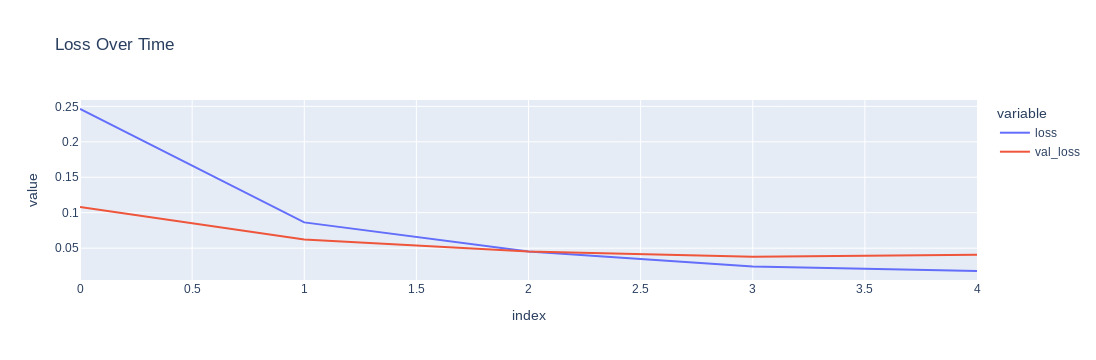

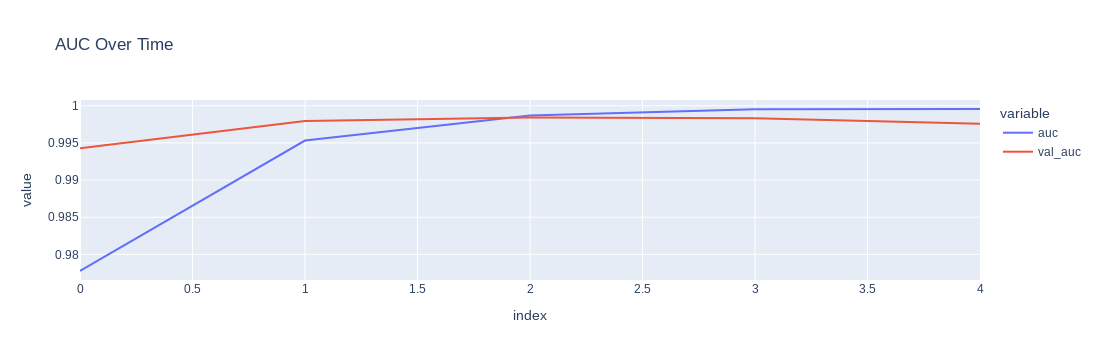

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


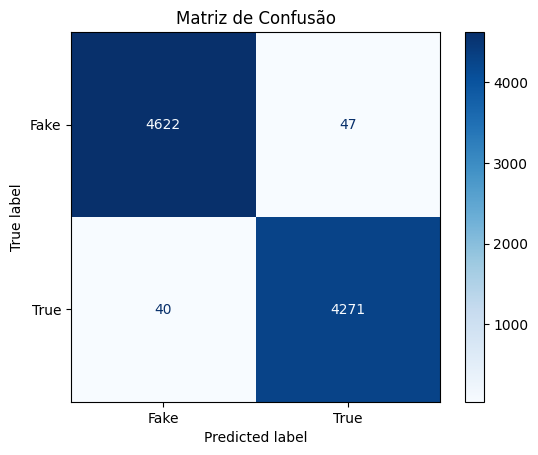

Relatório de Classificação:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4669
        True       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.9900 - auc: 0.9985 - loss: 0.0433
Precisão no conjunto de teste: 0.9903
AUC no conjunto de teste: 0.9988


In [12]:
fig = px.line(history.history, y=['loss', 'val_loss'], labels={'x': "Epoch", 'y': "Loss"}, title="Loss Over Time")
fig.show()
fig = px.line(history.history, y=['auc', 'val_auc'], labels={'x': "Epoch", 'y': "AUC"}, title="AUC Over Time")
fig.show()

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=['Fake', 'True']))
test_results = model.evaluate(X_test, y_test)
print(f"Precisão no conjunto de teste: {test_results[1]:.4f}")
print(f"AUC no conjunto de teste: {test_results[2]:.4f}")

## Validação cruzada K-Fold

Este trecho de código implementa um procedimento de validação cruzada k-fold para treinar e avaliar um modelo de rede neural. Inicialmente, são definidos os parâmetros de configuração: `k` (número de folds) como 5, `epochs` como 5, `batch_size` como 32, `vocab_size` (tamanho do vocabulário) como 10000, `embedding_dim` (dimensão da camada de embedding) como 100 e `max_len` (comprimento máximo da sequência) como 200. Um objeto `KFold` da biblioteca `scikit-learn` é inicializado para dividir os dados em `k` subconjuntos (folds), com embaralhamento (`shuffle=True`) e um estado aleatório (`random_state=42`) para garantir a reprodutibilidade das divisões.

O código então entra em um loop que itera `k` vezes, uma para cada fold. Em cada iteração, o fold atual é impresso. Os dados de treinamento (`X_train`, `y_train`) são divididos em conjuntos de treinamento (`X_train_cv`, `y_train_cv`) e validação (`X_val_cv`, `y_val_cv`) específicos para o fold corrente. Um novo modelo sequencial do Keras (`tf.keras.Sequential`) é construído em cada fold, composto por uma camada `Embedding`, uma camada `Bidirectional LSTM` que retorna sequências, uma camada `Dropout` (com taxa de 0.3), uma camada `GlobalAveragePooling1D` para reduzir a dimensionalidade temporal, uma camada `Dense` com ativação ReLU, outra camada `Dropout` (com taxa de 0.3), e uma camada `Dense` final com ativação sigmoide para classificação binária.

Este modelo recém-criado é compilado utilizando o otimizador 'adam', a função de perda 'binary_crossentropy' e a métrica de 'accuracy'. Em seguida, o modelo é treinado (`model.fit`) com os dados de treinamento do fold (`X_train_cv`, `y_train_cv`), utilizando os dados de validação do fold (`X_val_cv`, `y_val_cv`) para monitoramento, com `verbose=1` para exibir o progresso. Após o treinamento, são feitas previsões no conjunto de validação do fold, convertidas para inteiros (0 ou 1) com um limiar de 0.5, e um `classification_report` é impresso para avaliar o desempenho do modelo naquele fold específico. Por fim, o contador `fold` é incrementado para a próxima iteração.

In [13]:
k = 5
epochs = 5
batch_size = 32
vocab_size = 10000
embedding_dim = 100
max_len = 200

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

fold = 1
for train_idx, val_idx in kfold.split(X_train):
    print(f"\n📘 Fold {fold}")

    X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size,
              validation_data=(X_val_cv, y_val_cv), verbose=1)
    y_pred = (model.predict(X_val_cv) > 0.5).astype("int32")
    print(classification_report(y_val_cv, y_pred))
    fold += 1


📘 Fold 1
Epoch 1/5


/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



898/898 ━━━━━━━━━━━━━━━━━━━━ 167s 174ms/step - accuracy: 0.8713 - loss: 0.2651 - val_accuracy: 0.9774 - val_loss: 0.0661
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 181s 202ms/step - accuracy: 0.9883 - loss: 0.0410 - val_accuracy: 0.9832 - val_loss: 0.0486
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 184s 205ms/step - accuracy: 0.9935 - loss: 0.0244 - val_accuracy: 0.9802 - val_loss: 0.0588
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 201s 223ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.9855 - val_loss: 0.0525
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 199s 222ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9859 - val_loss: 0.0554
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3736
           1       0.98      0.99      0.99      3448

    accuracy                           0.99      7184
   macro avg       0.99      0.99      0.99      7184
weighted avg       0.99      0.99      0

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 199s 211ms/step - accuracy: 0.8787 - loss: 0.2660 - val_accuracy: 0.9813 - val_loss: 0.0606
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 205s 215ms/step - accuracy: 0.9847 - loss: 0.0486 - val_accuracy: 0.9808 - val_loss: 0.0555
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 177s 197ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9788 - val_loss: 0.0711
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 230s 257ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9857 - val_loss: 0.0580
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 194s 217ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9866 - val_loss: 0.0504
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3822
           1       0.98      0.99      0.99      3362

    accuracy                           0.99      7184
   macro avg       0.99      0.99      0.99      7184
weighted avg       0.99      0

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



898/898 ━━━━━━━━━━━━━━━━━━━━ 205s 217ms/step - accuracy: 0.8718 - loss: 0.2628 - val_accuracy: 0.9733 - val_loss: 0.0738
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 196s 219ms/step - accuracy: 0.9845 - loss: 0.0473 - val_accuracy: 0.9822 - val_loss: 0.0531
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 167s 186ms/step - accuracy: 0.9917 - loss: 0.0246 - val_accuracy: 0.9826 - val_loss: 0.0535
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 160s 179ms/step - accuracy: 0.9940 - loss: 0.0210 - val_accuracy: 0.9836 - val_loss: 0.0586
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 192s 213ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9848 - val_loss: 0.0560
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3746
           1       0.98      0.99      0.98      3438

    accuracy                           0.98      7184
   macro avg       0.98      0.98      0.98      7184
weighted avg       0.98      0.98      0

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 193s 191ms/step - accuracy: 0.8751 - loss: 0.2551 - val_accuracy: 0.9777 - val_loss: 0.0733
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 170s 189ms/step - accuracy: 0.9803 - loss: 0.0590 - val_accuracy: 0.9869 - val_loss: 0.0465
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 202s 190ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9830 - val_loss: 0.0533
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 172s 191ms/step - accuracy: 0.9942 - loss: 0.0168 - val_accuracy: 0.9751 - val_loss: 0.1022
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 211s 202ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9850 - val_loss: 0.0584
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3729
           1       0.99      0.98      0.98      3454

    accuracy                           0.98      7183
   macro avg       0.99      0.98      0.98      7183
weighted avg       0.98      0

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



898/898 ━━━━━━━━━━━━━━━━━━━━ 167s 176ms/step - accuracy: 0.8856 - loss: 0.2543 - val_accuracy: 0.9678 - val_loss: 0.0834
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 149s 166ms/step - accuracy: 0.9875 - loss: 0.0393 - val_accuracy: 0.9797 - val_loss: 0.0642
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 151s 168ms/step - accuracy: 0.9954 - loss: 0.0162 - val_accuracy: 0.9806 - val_loss: 0.0574
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 156s 174ms/step - accuracy: 0.9966 - loss: 0.0129 - val_accuracy: 0.9855 - val_loss: 0.0481
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 155s 173ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9857 - val_loss: 0.0759
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3779
           1       0.99      0.98      0.98      3404

    accuracy                           0.99      7183
   macro avg       0.99      0.99      0.99      7183
weighted avg       0.99      0.99      0.